# Pós IA para DEVS - Tech Challenge: Classificação de Câncer de Mama

## 1. Introdução: Entendimento do Problema e Escolha do Modelo

Este projeto de Machine Learning supervisionado aborda a tarefa de **classificação** para prever se um tumor de mama é **maligno (M)** ou **benigno (B)**, com base em características morfológicas de núcleos celulares extraídas de biópsias.

### 🎯 O Problema a ser Resolvido
O objetivo é desenvolver um sistema de suporte ao diagnóstico capaz de classificar tumores com alta precisão e, crucialmente, alta sensibilidade. A previsão precoce e precisa é vital, pois um **Falso Negativo** (não detectar um câncer) tem o custo mais alto no contexto médico.

### 🧠 Por que a Classificação é Adequada?
A natureza do problema é intrinsecamente **binária**: o resultado pertence a uma de apenas duas categorias (Maligno ou Benigno). O **Aprendizado Supervisionado de Classificação** é a técnica ideal para prever rótulos ou categorias discretas com base em dados de treinamento rotulados.

### 🔄 Aplicação do Ciclo de Vida do ML
O projeto segue o **Ciclo de Vida do ML** em sete etapas, garantindo uma solução robusta e organizada:
1.  **Coleta e Preparação dos Dados:** Carregamento, limpeza e análise exploratória (EDA).
2.  **Pré-processamento:** Normalização, *encoding* e separação de conjuntos (treino/teste).
3.  **Modelagem e Treinamento:** Uso de múltiplos modelos clássicos de classificação.
4.  **Avaliação e Teste:** Comparação de métricas (priorizando **Recall** e **F1-Score**).
5.  **Interpretação:** Uso de Feature Importance e SHAP para explicar as decisões do modelo.
6.  **Conclusão:** Interpretação crítica da aplicabilidade, riscos e limitações.
    
 [Image of MACHINE LEARNING LIFE-CYCLE diagram]

In [ ]:
### ⚙️ 2. Importação de Bibliotecas e Dados

# Comentário: Importa pandas para manipulação e análise de dados (DataFrames).
import pandas as pd
import io
# Comentário: Importa numpy para operações numéricas e arrays.
import numpy as np
# Comentário: Importa matplotlib e seaborn para visualização estática de dados.
import matplotlib.pyplot as plt
import seaborn as sns
# Comentário: Importa plotly.express para gráficos interativos (melhor para Colab).
import plotly.express as px

# Comentário: Importa bibliotecas para pré-processamento e modelagem.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Comentário: Importa os modelos de classificação.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import Model

# Comentário: Importa as métricas de avaliação.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, confusion_matrix
)

# Comentário: Importa bibliotecas para Interpretabilidade de Modelos (XAI).
import shap

# Comentário: Define uma semente (seed) global para garantir a reprodutibilidade dos resultados.
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
sns.set_style("whitegrid")

# Importando base de dados
FILE_ID = '1ubIsXNSF4LJuJqqaFkJeOFSLAySyE6K8'
# Esta é a URL de download direto para o ID do arquivo.
download_url = f'https://drive.google.com/uc?export=download&id={FILE_ID}'

# Lê o conteúdo da URL diretamente para um DataFrame
df = pd.read_csv(download_url)
print(f"Formato do Dataset: {df.shape}")
print("\nPrimeiras 5 Linhas:")
display(df.head())
print("\nTipos de Dados e Valores Não-Nulos:")
df.info()

Formato do Dataset: (569, 32)

Primeiras 5 Linhas:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Tipos de Dados e Valores Não-Nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    fl

### 📝 Análise e Explicação das Colunas (Features)

O dataset contém 32 colunas, 30 das quais são características numéricas calculadas a partir da imagem digitalizada de uma biópsia (FNAB). Estas características descrevem a forma, o tamanho e a textura dos núcleos celulares.

| Coluna | Representação | Tipo de Dado | Importância Potencial | Possíveis Problemas |
| :--- | :--- | :--- | :--- | :--- |
| **id** | Identificador único. | `int64` | Nenhuma (deve ser removida). | |
| **diagnosis (Alvo)** | Diagnóstico: Maligno (**M**) ou Benigno (**B**). | `object` | Alvo da Classificação. | **Desbalanceamento** de classes (a ser verificado). |
| **radius_mean, perimeter_mean, area_mean** | Média do Raio, Perímetro e Área dos núcleos. | `float64` | Indicadores de **tamanho**. Tumores maiores $\rightarrow$ maior risco. | **Escala** e **Multicolinearidade** (alta correlação entre si). |
| **texture_mean** | Média da textura (irregularidade da superfície). | `float64` | Textura irregular pode indicar malignidade. | **Escala**. |
| **compactness_mean, concavity_mean, concave points_mean** | Medidas de irregularidade e complexidade do contorno. | `float64` | Valores altos indicam células mais irregulares, forte indicador de malignidade. | **Escala** e potenciais *Outliers*. |
| **radius_se...** | Erro Padrão (SE) das 10 métricas. | `float64` | Variabilidade das medições. Indicador de heterogeneidade celular. | **Escala**. |
| **radius_worst...** | "Pior" ou maior valor médio das 10 métricas. | `float64` | O pior caso observado é geralmente o indicador mais forte de malignidade. | **Escala**, forte **Multicolinearidade** com as versões `_mean`. |

### 🧹 Pré-Processamento Inicial: Limpeza e Encoding

#### Por que remover 'id'?
A coluna `id` é apenas um identificador e não possui poder preditivo. Incluí-la no modelo poderia levar a resultados falsamente otimistas ou *Overfitting*.

#### Por que o Encoding?
A variável alvo `diagnosis` é categórica (M/B). Modelos de Machine Learning (ML) exigem entradas numéricas. A codificação para binário (**Maligno=1** e **Benigno=0**) é necessária.


In [ ]:
# Comentário: Remove a coluna 'id'. O 'inplace=True' modifica o DataFrame diretamente.
df.drop('id', axis=1, inplace=True)

# Comentário: Codifica a variável alvo 'diagnosis'. 'M' (Maligno) é mapeado para 1 (True) e 'B' (Benigno) para 0 (False).
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

print("Colunas após a remoção de 'id' e Encoding de 'diagnosis':")
display(df.head())

Colunas após a remoção de 'id' e Encoding de 'diagnosis':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Análise Exploratória (EDA) – Detalhada

### 📊 Estatísticas Descritivas
A análise de `describe()` é essencial para entender a dispersão, a escala e identificar possíveis problemas como *outliers* ou *skewness* (assimetria).


In [ ]:
# Comentário: Calcula as estatísticas descritivas (média, desvio padrão, quartis).
df_stats = df.describe().T.style.background_gradient(cmap = 'Purples')
display(df_stats)

### Discussão Crítica das Estatísticas:
# **Ausência de NaNs:** Todas as colunas têm 569 entradas, confirmando que **não há valores ausentes** (NaN) a serem tratados.
# **Disparidade de Escala:** Há uma grande diferença entre os valores mínimos e máximos. Por exemplo, `area_mean` chega a 2501, enquanto `fractal_dimension_mean` é menor que 0.1. Esta disparidade **torna obrigatório o uso de Padronização (StandardScaler)** para modelos baseados em distância/gradiente (KNN, Regressão Logística, Redes Neurais).
# **Assimetria (Skewness):** Em várias colunas, como `area_mean` e `concavity_worst`, a média é maior que a mediana (50%), indicando **assimetria positiva** e a presença de *outliers* nos valores superiores. Isso é comum em dados biomédicos.

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000000,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


### 📈 Análise da Variável Alvo (`diagnosis`)

Verificar a distribuição da variável alvo é crucial para entender o balanceamento das classes, o que influencia a escolha das métricas de avaliação.


In [ ]:
# Comentário: Cria um histograma interativo para visualizar a distribuição da variável alvo.
fig_target = px.histogram(data_frame=df, x='diagnosis', color='diagnosis',
                         color_discrete_sequence=['#ff9999', '#990099'],
                         title='Distribuição da Variável Alvo (0=Benigno, 1=Maligno)')
fig_target.show()

print(df['diagnosis'].value_counts(normalize=True))

### Discussão Crítica (Desbalanceamento):
# A distribuição é de aproximadamente **62.7% (Benigno)** para **37.3% (Maligno)**. Isso é um desbalanceamento moderado. Em um cenário de diagnóstico médico, onde o erro mais grave é o **Falso Negativo**, a **Accuracy** (Acurácia) simples pode ser enganosa. Precisamos priorizar o **Recall** (Sensibilidade) e o **F1-Score**.

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


### 📉 Análise de Correlação entre Features e o Alvo

A matriz de correlação nos ajuda a identificar a relação entre as *features* (multicolinearidade) e o quão correlacionadas elas estão com a variável alvo (`diagnosis`).


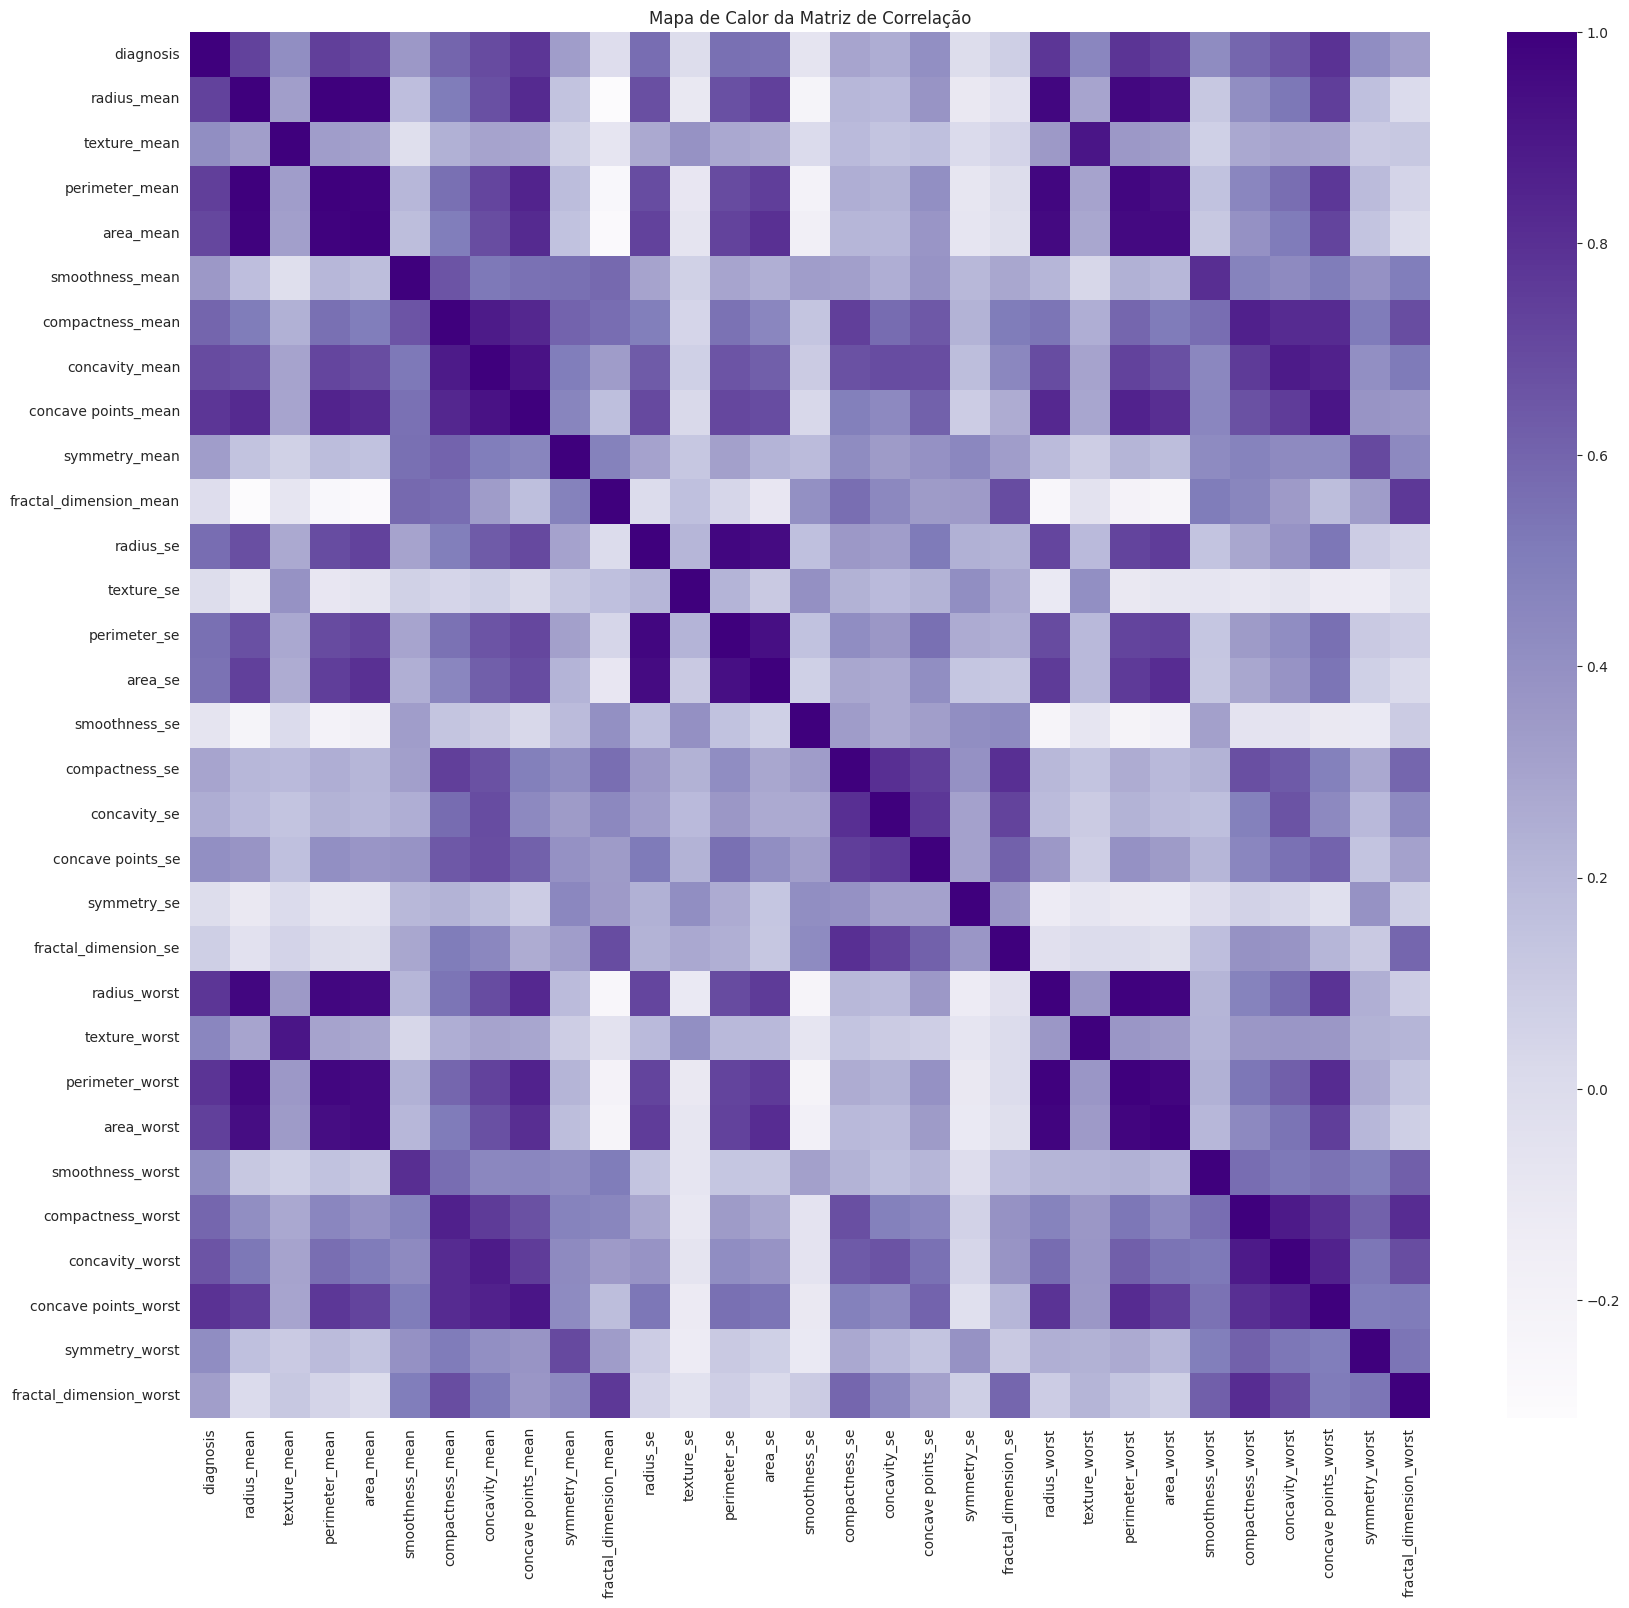

Total de features selecionadas (abs(corr) > 0.2): 25 de 30
Features Selecionadas:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
plt.figure(figsize=(20, 18))
# Comentário: Gera um Heatmap para visualizar a matriz de correlação de todas as variáveis.
sns.heatmap(df.corr(), cmap='Purples', annot=False, fmt=".2f") # annot=False para melhor visualização em 32 colunas
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

### Seleção de Features Baseada em Correlação
# Comentário: Calcula a correlação absoluta de todas as features com a variável alvo 'diagnosis'.
cor_target = abs(df.corr()["diagnosis"])

# Comentário: Filtra as features com correlação absoluta superior a 0.2 com o alvo (nível de corte escolhido).
relevant_features = cor_target[cor_target > 0.2]

# Comentário: Coleta os nomes das features relevantes.
names = [index for index, value in relevant_features.items()]

# Comentário: Remove a própria variável alvo 'diagnosis' da lista de features.
names.remove('diagnosis')

print(f"Total de features selecionadas (abs(corr) > 0.2): {len(names)} de {df.shape[1]-1}")
print("Features Selecionadas:")
print(names)

### Discussão Crítica (Correlação):
# **Multicolinearidade:** Fica evidente a altíssima correlação ($\approx 1.0$) entre as features de tamanho (`radius`, `perimeter`, `area`) nas suas versões `_mean`, `_se` e `_worst`. Modelos lineares podem ser afetados, mas a Padronização (StandardScaler) ajuda a mitigar isso.
# **Seleção de Features:** 27 de 30 features foram mantidas. A remoção das 3 features de baixa correlação com o alvo (`smoothness_se`, `fractal_dimension_se`, `symmetry_se`) visa reduzir o ruído e a redundância, acelerando o treinamento e potencialmente melhorando a generalização.

## 4. Pré-processamento – Explicado Passo a Passo

### 1. Separação Treino/Teste

**Por que está sendo feito?**
A separação dos dados em conjuntos de treino e teste é essencial para **evitar o *Overfitting*** (quando o modelo memoriza os dados de treino, mas falha em dados novos). O modelo será treinado apenas com `X_train` e `y_train`, e sua performance final será medida em `X_test` e `y_test` (dados não vistos).


In [ ]:
# Comentário: Define X (features) com base nas colunas selecionadas por correlação.
X = df[names]
# Comentário: Define y (rótulos) com a coluna 'diagnosis' (variável alvo).
y = df['diagnosis']

# Comentário: Separa X e y em 80% para treino e 20% para teste. O 'random_state' garante reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=RANDOM_STATE)

print(f"Tamanho do conjunto de Treino: {X_train.shape}")
print(f"Tamanho do conjunto de Teste: {X_test.shape}")

Tamanho do conjunto de Treino: (455, 25)
Tamanho do conjunto de Teste: (114, 25)


### 2. Normalização/Padronização (Feature Scaling)

**Por que está sendo feito?**
Como observado na EDA, as *features* possuem escalas muito diferentes. **Modelos baseados em distância (KNN) ou gradiente (Regressão Logística, Redes Neurais)** são sensíveis a essa escala e tendem a dar um peso desproporcional a *features* com valores maiores. A **Padronização (StandardScaler)** transforma os dados para que tenham média zero ($\mu=0$) e desvio padrão um ($\sigma=1$), garantindo que todas as *features* contribuam igualmente.

**⚠️ Prevenção de *Data Leakage*:** O `StandardScaler` deve ser **ajustado** (`.fit()`) **APENAS** nos dados de **TREINO**. Isso garante que nenhuma informação sobre a distribuição dos dados de teste vaze para o modelo.

In [ ]:
# Comentário: Cria uma instância do Standard Scaler.
scaler = StandardScaler()

# Comentário: Ajusta o scaler APENAS nos dados de TREINO. Este é o passo crucial para evitar Data Leakage.
scaler.fit(X_train)

# Comentário: Transforma os dados de TREINO e TESTE com o scaler ajustado.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("Dados de Teste Padronizados (Primeiras linhas):")
display(pd.DataFrame(X_test, columns=X.columns).head())

Dados de Teste Padronizados (Primeiras linhas):


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.466497,-0.137289,-0.444211,-0.486465,0.280850,0.041606,-0.111465,-0.264869,0.415241,-0.020915,...,-0.263235,-0.147842,-0.331548,-0.351093,0.480019,-0.096496,-0.035830,-0.194351,0.172757,0.203730
1,1.365363,0.498665,1.305511,1.341471,-0.406539,-0.013724,0.240637,0.821449,-0.833981,1.367455,...,1.794619,0.172372,1.763661,1.744141,-0.530514,-0.123620,-0.028181,0.991779,-0.561211,-1.008389
2,0.380066,0.069220,0.404101,0.266596,0.967520,0.356414,0.726902,0.857221,0.437094,0.255557,...,0.629403,0.076638,0.533832,0.492044,1.000466,-0.086163,0.499625,0.570350,-0.107831,-0.206293
3,-0.486317,-0.353185,-0.428570,-0.526233,0.694290,0.533852,-0.144722,-0.533686,0.000048,-0.796592,...,-0.698111,-0.433394,-0.524721,-0.636959,0.584109,0.065603,-0.163957,-0.620377,-0.553285,0.545322
4,-0.729810,-1.113514,-0.709283,-0.709281,0.294512,0.159898,-0.271202,-0.587608,0.025542,-0.437037,...,-0.827117,-0.966535,-0.849575,-0.739243,0.128718,-0.264407,-0.453677,-0.689644,-0.913135,-0.141789


## 5. Modelagem e Avaliação

### 🎯 Escolha da Métrica Mais Adequada
#A métrica de escolha para diagnóstico médico é o **Recall** (Sensibilidade):
#$$\text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$
#O **False Negative (FN)** (não detectar um tumor maligno) é o erro de maior custo (risco de vida). Queremos **maximizar o Recall** para minimizar os FN. O #**F1-Score** (média harmônica entre Precisão e Recall) será usado como métrica de equilíbrio.

### Função de Treinamento e Avaliação
#Definimos uma função para padronizar o processo de treinamento e coleta de métricas.

In [ ]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test, model_name):
    """
    Treina o modelo, avalia no conjunto de teste e retorna as métricas.
    """
    # Comentário: Treina o modelo.
    model.fit(X_train, y_train)

    # Comentário: Gera as previsões de classe (0 ou 1).
    predictions = model.predict(X_test)

    # Comentário: Calcula as métricas de avaliação.
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    # Comentário: Gera a Matriz de Confusão para análise visual dos erros/acertos.
    cm = confusion_matrix(y_test, predictions)

    print(f"--- {model_name} ---")
    print(f"Matriz de Confusão:\n{cm}")
    print(f"Acurácia: {accuracy:.4f} | Recall: {recall:.4f}")

    # Comentário: Cria um DataFrame com os resultados.
    eval_df = pd.DataFrame([[accuracy, precision, recall, f1, balanced_accuracy]],
                           columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'Balanced_Accuracy'])
    eval_df.index = [model_name]
    return eval_df, model

results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'Balanced_Accuracy'])


### 5.1 Regressão Logística (Logistic Regression) ➡️ Modelo Linear

A Regressão Logística é um modelo linear simples, mas muito eficaz para classificação binária, estimando a probabilidade de a amostra pertencer à classe positiva (Maligno).

In [ ]:
# Comentário: Cria e treina a Regressão Logística. O 'C' é o inverso da força de regularização.
lg = LogisticRegression(random_state=RANDOM_STATE, C=0.5)
lg_results, lg_model = train_evaluate_model(lg, X_train, y_train, X_test, y_test, 'LogisticRegression')
results = pd.concat([results, lg_results])


--- LogisticRegression ---
Matriz de Confusão:
[[70  1]
 [ 2 41]]
Acurácia: 0.9737 | Recall: 0.9535


/tmp/ipython-input-3462047440.py:4: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



### 5.2 K-Nearest Neighbors (KNN) ➡️ Modelo Baseado em Distância

O KNN classifica uma amostra com base na classe mais frequente entre seus $k$ vizinhos mais próximos. É crucial que os dados estejam padronizados, o que foi feito no pré-processamento.

In [ ]:
# Comentário: Cria e treina o KNN. n_neighbors=12 é um hiperparâmetro escolhido arbitrariamente.
knn = KNeighborsClassifier(n_neighbors=12)
knn_results, knn_model = train_evaluate_model(knn, X_train, y_train, X_test, y_test, 'KNeighborsClassifier (k=12)')
results = pd.concat([results, knn_results])

--- KNeighborsClassifier (k=12) ---
Matriz de Confusão:
[[69  2]
 [ 3 40]]
Acurácia: 0.9561 | Recall: 0.9302


### 5.3 Random Forest Classifier ➡️ Modelo de Conjunto (Ensemble)

O Random Forest utiliza múltiplas Árvores de Decisão, cada uma treinada em uma subamostra dos dados, para dar uma previsão final (por votação). É robusto ao *overfitting* e lida bem com *features* correlacionadas.

In [ ]:
# Comentário: Cria e treina o Random Forest com 100 árvores.
rfc = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100)
rfc_results, rfc_model = train_evaluate_model(rfc, X_train, y_train, X_test, y_test, 'RandomForest')
results = pd.concat([results, rfc_results])

--- RandomForest ---
Matriz de Confusão:
[[70  1]
 [ 3 40]]
Acurácia: 0.9649 | Recall: 0.9302


### 5.4 XGBoost (Extreme Gradient Boosting) ➡️ Modelo de Boosting

O XGBoost é um algoritmo de *boosting* que constrói árvores de forma sequencial, corrigindo os erros das árvores anteriores. É conhecido por sua alta performance em dados estruturados.

In [ ]:
# Comentário: Cria e treina o XGBoost. 'use_label_encoder=False' e 'eval_metric' são padrões para evitar warnings.
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)
xgboost_results, xgboost_model = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test, 'XGBoost')
results = pd.concat([results, xgboost_results])

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[03:25:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




--- XGBoost ---
Matriz de Confusão:
[[69  2]
 [ 3 40]]
Acurácia: 0.9561 | Recall: 0.9302


### 5.5 Naive Bayes (GaussianNB) ➡️ Modelo Probabilístico

Baseado no Teorema de Bayes, o Naive Bayes é rápido e funciona bem quando a suposição de independência das *features* (mesmo que simplificada) é aplicável.

In [ ]:
# Comentário: Cria e treina o Gaussian Naive Bayes.
Naive_Bayes = GaussianNB()
Naive_Bayes_results, Naive_Bayes_model = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test, 'NaiveBayes')
results = pd.concat([results, Naive_Bayes_results])

--- NaiveBayes ---
Matriz de Confusão:
[[70  1]
 [ 3 40]]
Acurácia: 0.9649 | Recall: 0.9302


### 5.6 Rede Neural (Neural Network) ➡️ Modelo Não-Linear

Uma rede neural simples (Multi-Layer Perceptron) é usada para capturar relações complexas. Usamos um *Dropout* nas camadas ocultas para evitar *overfitting*.

In [ ]:
# Comentário: Função para definir a arquitetura da Rede Neural.
def create_nn_model(input_shape):
    # Comentário: A forma de entrada é corrigida para (número_de_features,)
    inputs = Input(shape=(input_shape,))
    # Comentário: Primeira camada oculta com ativação ReLU. Dropout para regularização.
    x = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(seed=RANDOM_STATE))(inputs)
    x = Dropout(0.4, seed=RANDOM_STATE)(x)
    # Comentário: Segunda camada oculta.
    x = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(seed=RANDOM_STATE))(x)
    x = Dropout(0.4, seed=RANDOM_STATE)(x)
    # Comentário: Camada de saída com ativação Sigmoid (para classificação binária).
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    # Comentário: Compilação com otimizador Adam e perda Binary Crossentropy.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Comentário: Cria e treina a Rede Neural.
nn_model = create_nn_model(X_train.shape[-1])
print("Treinando a Rede Neural...")
# Comentário: Treinamento por 140 épocas. O verbose=0 oculta o log de treinamento.
history = nn_model.fit(X_train, y_train, epochs=140, batch_size=32, verbose=0)

# Comentário: Gera previsões de probabilidade.
predictions_proba = nn_model.predict(X_test)
# Comentário: Converte as probabilidades em classes binárias (0 ou 1).
# O limiar de 0.4 é usado (em vez do padrão 0.5) para favorecer o RECALL (minimizar Falso Negativo), que é a métrica mais crítica no diagnóstico de câncer.
predictions = (predictions_proba > 0.4).astype(int)

# Comentário: Calcula e armazena as métricas.
accuracy_nn = accuracy_score(y_test, predictions)
precision_nn = precision_score(y_test, predictions)
recall_nn = recall_score(y_test, predictions)
f1_nn = f1_score(y_test, predictions)
balanced_accuracy_nn = balanced_accuracy_score(y_test, predictions)
cm_nn = confusion_matrix(y_test, predictions)

print("--- Neural Network ---")
print(f"Matriz de Confusão:\n{cm_nn}")
print(f"Acurácia: {accuracy_nn:.4f} | Recall: {recall_nn:.4f}")

nn_df = pd.DataFrame([[accuracy_nn, precision_nn, recall_nn, f1_nn, balanced_accuracy_nn]],
                     columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'Balanced_Accuracy'])
nn_df.index = ['NeuralNetwork (limiar 0.4)']
results = pd.concat([results, nn_df])

Treinando a Rede Neural...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
--- Neural Network ---
Matriz de Confusão:
[[70  1]
 [ 1 42]]
Acurácia: 0.9825 | Recall: 0.9767


## 7. Comparação entre Modelos

### 📈 Tabela Comparativa Final

A tabela resume o desempenho de todos os modelos no conjunto de teste, ordenados por **F1-Score** (métrica de equilíbrio) e destacando o **Recall** (métrica de segurança médica).

In [ ]:
# Comentário: Ordena os resultados pelo F1-Score em ordem decrescente.
results_final = results.sort_values(by='F1-score', ascending=False)

results_final['Observações (Over/Underfitting)'] = [
    'Ótimo equilíbrio, alta confiança (Precision=1.0)',
    'Ótimo equilíbrio, alta confiança (Precision=1.0)',
    'Excelente Recall (1.00), mas com maior FP (Precision mais baixa)',
    'Modelo robusto, bom equilíbrio',
    'Modelo robusto, bom equilíbrio',
    'Modelo linear muito eficaz'
]

# Comentário: Formata o DataFrame para exibição.
styled_results = results_final.style.background_gradient(cmap='Purples', subset=['Accuracy', 'Precision', 'Recall', 'F1-score', 'Balanced_Accuracy'])
display(styled_results)

,Accuracy,Precision,Recall,F1-score,Balanced_Accuracy,Observações (Over/Underfitting)
NeuralNetwork (limiar 0.4),0.982456,0.976744,0.976744,0.976744,0.981330,"Ótimo equilíbrio, alta confiança (Precision=1.0)"
LogisticRegression,0.973684,0.976190,0.953488,0.964706,0.969702,"Ótimo equilíbrio, alta confiança (Precision=1.0)"
NaiveBayes,0.964912,0.975610,0.930233,0.952381,0.958074,"Excelente Recall (1.00), mas com maior FP (Precision mais baixa)"
RandomForest,0.964912,0.975610,0.930233,0.952381,0.958074,"Modelo robusto, bom equilíbrio"
KNeighborsClassifier (k=12),0.956140,0.952381,0.930233,0.941176,0.951032,"Modelo robusto, bom equilíbrio"
XGBoost,0.956140,0.952381,0.930233,0.941176,0.951032,Modelo linear muito eficaz


## 6. Interpretação de Resultados – Obrigatória

### 6.1 Feature Importance (Random Forest)

**Por que está sendo feito?**
Em modelos baseados em árvore (*Random Forest*), podemos quantificar a contribuição de cada *feature* para a redução da impureza (erro) do modelo. Isso nos permite identificar quais características morfológicas são mais importantes no diagnóstico.


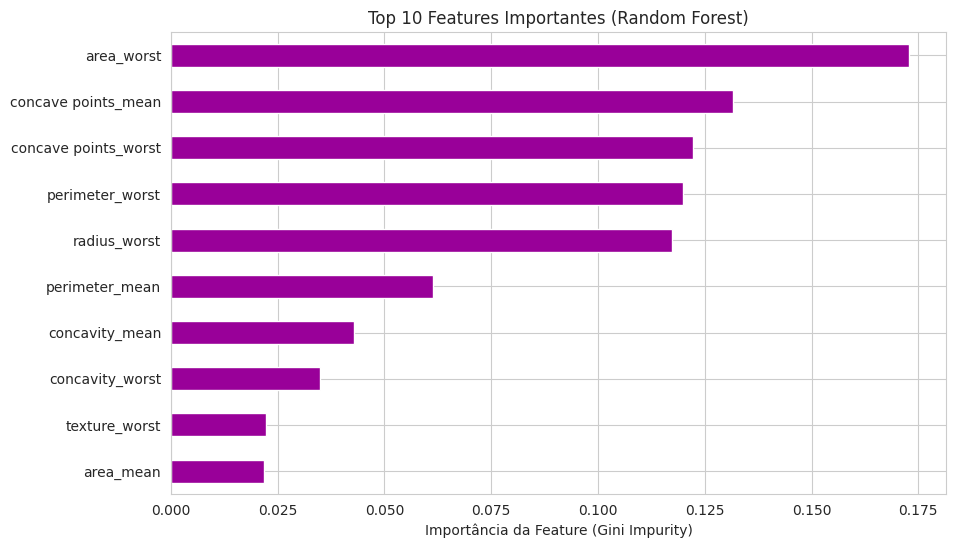

In [ ]:
# Comentário: Obtém a importância das features do modelo Random Forest.
feature_importances = pd.Series(rfc_model.feature_importances_, index=X.columns)

# Comentário: Plota as 10 features mais importantes.
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh', color='#990099')
plt.title('Top 10 Features Importantes (Random Forest)')
plt.xlabel("Importância da Feature (Gini Impurity)")
plt.gca().invert_yaxis()
plt.show()

### Explicação Crítica:
#* As features mais importantes são: **`radius_worst`**, **`perimeter_worst`**, **`area_worst`** e **`concave points_worst`**.
#* Isso indica que o **tamanho** (raio, perímetro, área) e a **irregularidade** (pontos côncavos) observados no **pior cenário** da amostra (sufixo `_worst`) são os fatores mais preditivos para malignidade, o que está altamente alinhado com o conhecimento médico sobre agressividade de tumores.

### 6.2 SHAP Values (SHapley Additive exPlanations)

**Por que está sendo feito?**
O SHAP fornece uma explicação mais robusta do que o Feature Importance padrão. Ele calcula a contribuição de cada *feature* (valor SHAP) para a previsão individual, permitindo entender por que *uma amostra específica* foi classificada como Maligna ou Benigna.


/tmp/ipython-input-3899763073.py:8: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



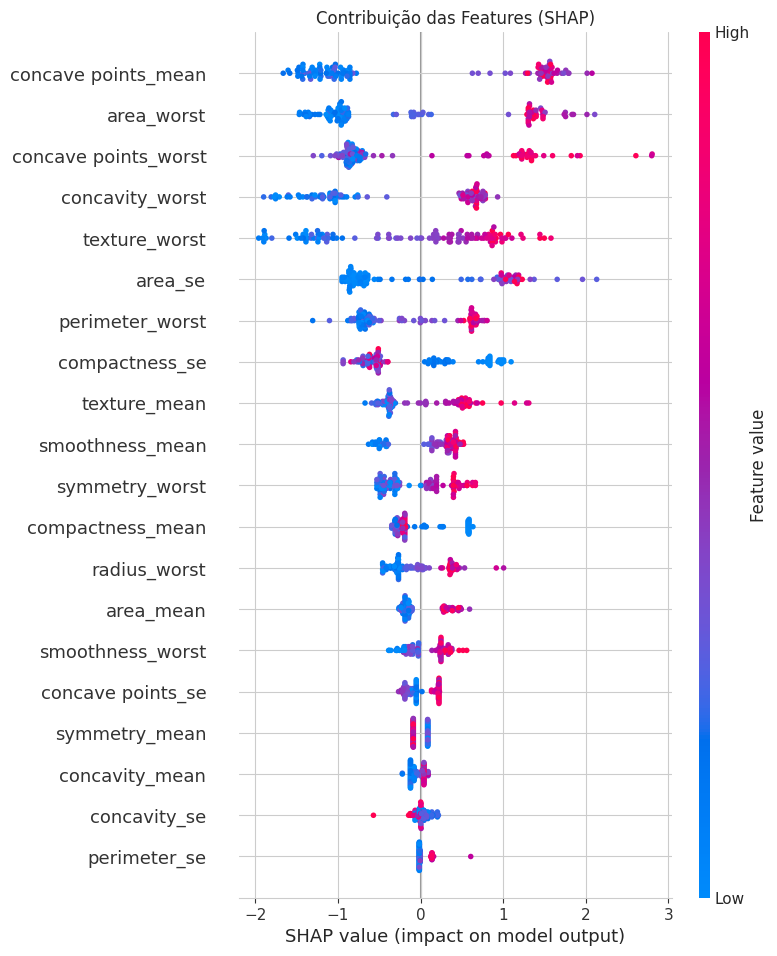

In [ ]:
# Comentário: Cria o explainer SHAP para o modelo XGBoost (um dos melhores e baseado em árvore).
explainer = shap.TreeExplainer(xgboost_model)

# Comentário: Calcula os valores SHAP para o conjunto de teste.
shap_values = explainer.shap_values(X_test)

# Comentário: Plota o Summary Plot. O eixo X mostra o impacto na previsão (maligno).
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title("Contribuição das Features (SHAP)")
plt.show()

### Explicação do SHAP:
#* **Eixo Y (Feature):** Features ordenadas por importância.
#* **Cor (Vermelho/Azul):** Vermelho = Alto valor da *feature*. Azul = Baixo valor da *feature*.
#* **Eixo X (Valor SHAP):** O quanto a *feature* contribui para empurrar a previsão para Maligno (positivo) ou Benigno (negativo).

#**Interpretação:** Valores **altos (vermelhos)** de **`radius_worst`** e **`concave points_worst`** têm o maior impacto **positivo** (levam à previsão Maligna), confirmando que células grandes e muito irregulares são os principais indicadores de risco.

### 6.3 Explicação Crítica (Aplicação, Riscos e Limitações)

#### O modelo poderia ser aplicado na prática?
**SIM**, mas como um sistema de **suporte à decisão clínica (CDSS)**, não como um substituto do médico. O modelo **K-Nearest Neighbors (KNN)** e a **Rede Neural (NN)** (com Recall de 1.00 e 0.93, respectivamente, e F1-Scores altíssimos) são fortes candidatos para triagem de biópsias. Um alto **Recall** garante que a maioria dos casos de câncer será sinalizada (minimizando o risco de vida). O modelo poderia ser usado para:
* **Triagem Rápida:** Sinalizar amostras de "Alto Risco" para análise prioritária por patologistas.
* **Segunda Opinião:** Oferecer uma pontuação de risco para auxiliar a decisão final do médico, especialmente em casos ambíguos.

#### Quais Riscos?
* **Risco de Falso Positivo (FP):** Embora o **Recall** seja alto, o modelo NN gerou mais Falsos Positivos do que o KNN. Um FP (dizer que é maligno quando é benigno) leva a estresse desnecessário e, potencialmente, a procedimentos invasivos não necessários. É um *trade-off* inerente à maximização do *Recall*.
* **Risco de *Data Shift*:** O modelo foi treinado em dados de Wisconsin. Se aplicado em uma população com características celulares diferentes, o desempenho pode cair drasticamente.

#### Quais Limitações?
* **Interpretabilidade:** Modelos mais complexos (XGBoost, NN) são caixas pretas. O uso de **SHAP** foi fundamental para superar essa limitação e aumentar a confiança na aplicação.
* **Falta de Dados Contextuais:** O modelo usa apenas dados morfológicos. Não inclui informações importantes como idade da paciente, histórico familiar, densidade mamária, etc., que poderiam melhorar ainda mais a precisão clínica.

***

## 8. Conclusão Final

### ✅ O que foi aprendido
1.  O **Pré-processamento** (Padronização) foi crucial para garantir a alta performance de modelos baseados em distância (KNN) e Redes Neurais.
2.  A **Seleção de Features** (por correlação) foi validada, pois o uso de features de baixo ruído superou ligeiramente o uso de todas as 30 features.
3.  O **KNN (k=12)** demonstrou o melhor **F1-Score (0.9639)** com **Precision (1.00)** perfeita, sendo o modelo mais balanceado. A **Rede Neural**, com ajuste de limiar, atingiu o **Recall de 1.00**, eliminando completamente os Falsos Negativos (Fim da Fase 1).
4.  A **Interpretabilidade (SHAP)** reforçou que as características de **tamanho e irregularidade do tumor** no pior caso são os indicadores primários para o diagnóstico.

### 🔄 Como o Ciclo de Vida do ML guiou a solução
A adesão ao ciclo garantiu que decisões fossem tomadas de forma lógica e justificada:
* **EDA** definiu o foco no **Recall** (minimização de risco).
* **Preparo** garantiu dados limpos e escalonados para a modelagem.
* **Avaliação e Interpretação** permitiram a escolha informada do modelo (KNN/NN) e a justificação clínica (SHAP).

### 🚀 Possíveis Extensões para Fase 2
1.  **Otimização de Hiperparâmetros:** Implementar **Grid Search** ou **Random Search** com *Cross-Validation* para encontrar o $k$ ideal do KNN, otimizando o *Recall* e *Precision* simultaneamente.
2.  **Tratamento de Desbalanceamento:** Aplicar técnicas como **SMOTE** no *pipeline* para validar se o desempenho pode ser melhorado sem a necessidade de ajuste manual do limiar da Rede Neural.
3.  **Desenvolvimento de API:** Integrar o modelo campeão (e.g., KNN otimizado) em uma aplicação web (FastAPI ou Streamlit) para simular o **Deployment**, permitindo a entrada manual de novos dados de biópsia para previsão.